In [38]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import math
from scipy.optimize import curve_fit

In [39]:
R = 1

def evaluateVolume(dim, N, Ness=100):
# Fonction qui prend la moyenne de Ness essai de calcul du volume 
# d'une sphère en Dim dimensions avec N points
    volume_th = np.pi**((dim/2))/math.gamma(dim/2 + 1)
    V_sphere = np.zeros(Ness)
    error=np.zeros(Ness)
    for i in range(Ness):
        N_int =0
        N_tot = 0
        V_tot=(2*R)**dim
        for n in range(N):  
            # np.random.seed()  
            # random_point = np.random.uniform(low=-R, high=R, size=Dim)
            random_list = [random.uniform(-R, R) for _ in range(dim)]
            # if np.sum(random_point**2) <= R**2:
            if sum(x**2 for x in random_list) <= R**2:
                N_int += 1
            N_tot+=1
            
        V_sphere[i] = N_int/N_tot*V_tot
        error[i] = np.abs((V_sphere[i] - volume_th)/volume_th)
    return np.mean(V_sphere), np.std(V_sphere), np.mean(error)


results=[]
for dim in [3, 6]:
    for n in 100*np.array([1, 2, 4, 8, 16]):
        volume, incertitude, error = evaluateVolume(dim, n)
        # volume_th = np.pi**((dim/2))/math.gamma(dim/2 + 1)
        # error = np.abs((volume - volume_th)/volume_th)
        results.append({'Dim': dim, 'N': n, 'Vol': volume, 'Inc' : incertitude/volume, 'Err_rel' : error})
        
df = pd.DataFrame(results)
print(df)


   Dim     N      Vol       Inc   Err_rel
0    3   100  4.20160  0.104305  0.086463
1    3   200  4.15440  0.062399  0.050779
2    3   400  4.18400  0.044908  0.036818
3    3   800  4.17780  0.032522  0.026917
4    3  1600  4.18395  0.025446  0.020657
5    6   100  5.36960  0.301479  0.249115
6    6   200  5.02400  0.226182  0.175915
7    6   400  5.19040  0.150848  0.118762
8    6   800  5.16480  0.114272  0.093134
9    6  1600  5.18520  0.087206  0.070420


[-0.50466695 -0.22126012]


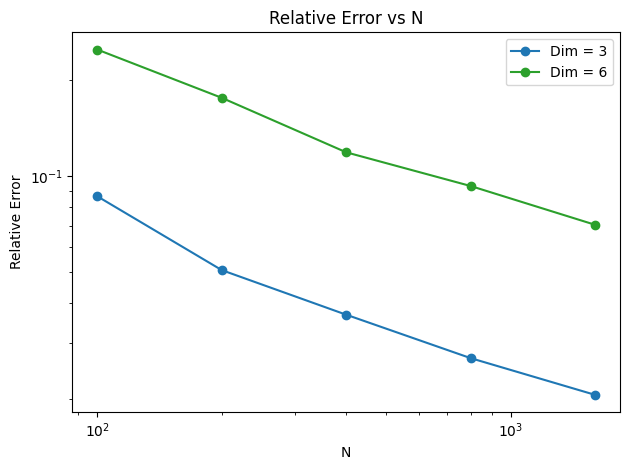

In [40]:
# Separate DataFrames for each dimension
df_dim3 = df[df['Dim'] == 3]
df_dim6 = df[df['Dim'] == 6]

def power_function(x, p, b):
    return p*x+b

x_data_3 = np.zeros([5])
y_data_3 = np.zeros([5])
x_data_6 = np.zeros([5])
y_data_6 = np.zeros([5])

for i in range(len(df_dim3['N'])):
    x_data_3[i] = df_dim3['N'][i]
    y_data_3[i] = df_dim3['Err_rel'][i]
    x_data_6[i] = df_dim3['N'][i]
    y_data_6[i] = df_dim3['Err_rel'][i]

# Plot for Dim = 3
p_opt_3, cov = curve_fit(power_function, np.log(x_data_3), np.log(y_data_3) )
print(p_opt_3)
plt.loglog(df_dim3['N'], df_dim3['Err_rel'], marker='o', label='Dim = 3')
plt.loglog(x_data_3, power_function(x_data_3, p_opt_3[0], p_opt_3[1]))
# Curve fit for Dim = 3
p_opt_dim3, _ = curve_fit(power_function, np.array(df_dim3['N']), np.array(df_dim3['Err_rel']))
# plt.plot(df_dim3['N'], power_function(df_dim3['N'], p_opt_dim3), 'r--', label=f'Fit (Dim = 3, p={p_opt_dim3[0]:.2f})')

# Plot for Dim = 6
plt.loglog(df_dim6['N'], df_dim6['Err_rel'], marker='o', label='Dim = 6')

# Curve fit for Dim = 6
# p_opt_dim6, _ = curve_fit(power_function, np.array(df_dim6['N']), np.array(df_dim6['Err_rel']))
# plt.plot(df_dim6['N'], power_function(df_dim6['N'], p_opt_dim6), 'b--', label=f'Fit (Dim = 6, p={p_opt_dim6[0]:.2f})')

plt.title('Relative Error vs N')
plt.xlabel('N')
plt.ylabel('Relative Error')
plt.legend()

plt.tight_layout()
plt.show()

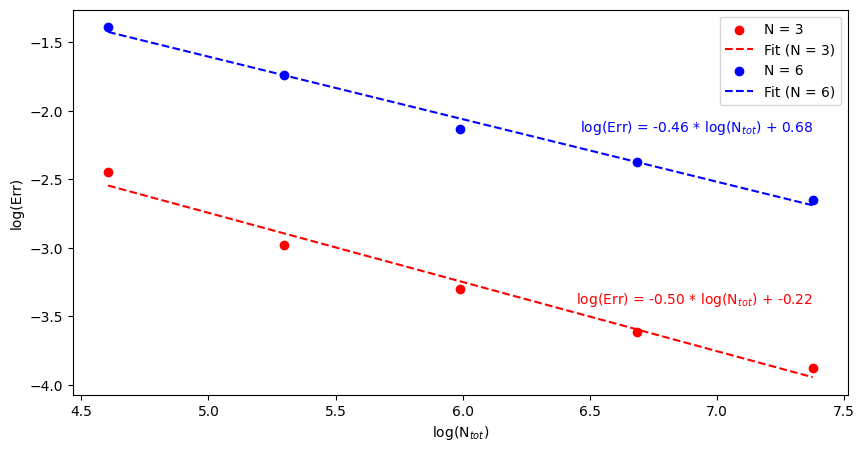

In [44]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Function for curve fit in logarithmic space
def log_linear_function(x, p, b):
    return p * np.log(x) + b

# Filter data for Dim = 3 and Dim = 6
df_dim3 = df[df['Dim'] == 3]
df_dim6 = df[df['Dim'] == 6]

# Plotting
plt.figure(figsize=(10, 5))

# Plot for Dim = 3
plt.scatter(np.log(df_dim3['N']), np.log(df_dim3['Err_rel']), marker='o', label='N = 3', color='r')

# Curve fit for Dim = 3
params_dim3, _ = curve_fit(log_linear_function, df_dim3['N'], np.log(df_dim3['Err_rel']))
plt.plot(np.log(df_dim3['N']), log_linear_function(df_dim3['N'], *params_dim3), 'r--', label=f'Fit (N = 3)')

# Add text annotation for Dim = 3
equation_dim3 = f'log(Err) = {params_dim3[0]:.2f} * log(N$_{{tot}}$) + {params_dim3[1]:.2f}'
plt.text(np.log(df_dim3['N'].max()), np.log(df_dim3['Err_rel'].max()) -1 , equation_dim3, color='r', verticalalignment='bottom', horizontalalignment='right')

# Plot for Dim = 6
plt.scatter(np.log(df_dim6['N']), np.log(df_dim6['Err_rel']), marker='o', label='N = 6', color='b')

# Curve fit for Dim = 6
params_dim6, _ = curve_fit(log_linear_function, df_dim6['N'], np.log(df_dim6['Err_rel']))
plt.plot(np.log(df_dim6['N']), log_linear_function(df_dim6['N'], *params_dim6), 'b--', label=f'Fit (N = 6)')

# Add text annotation for Dim = 6
equation_dim6 = f'log(Err) = {params_dim6[0]:.2f} * log(N$_{{tot}}$) + {params_dim6[1]:.2f}'
plt.text(np.log(df_dim6['N'].max()), np.log(df_dim6['Err_rel'].max()) - 0.8, equation_dim6, color='b', verticalalignment='bottom', horizontalalignment='right')

# plt.title('Logarithmic Relative Error vs Logarithmic N')
plt.xlabel('log(N$_{tot}$)')
plt.ylabel('log(Err)')
plt.legend()

# plt.tight_layout()
plt.savefig('ErrvsN.png')
plt.show()
